In [ ]:
# Author: Vaishali Patel | Project: Recruitment Funnel Prediction | Dataset: aug_train.csv


In [2]:
# Importing Required Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pt 
import seaborn as sns
import matplotlib.pyplot as plt

#Set dark Power BI theme
plt.style.use('dark_background')
sns.set_palette(['#00b8a9', '#a14bc6'])

In [3]:
df=pd.read_csv(r'C:\Users\Rushikesh Patil\Downloads\archive (1)\aug_train.csv')
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
## 📊 Step 1: Exploratory Data Analysis (EDA)

In [5]:
print("Shape of the data:",df.shape)
df.info()


Shape of the data: (19158, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: floa

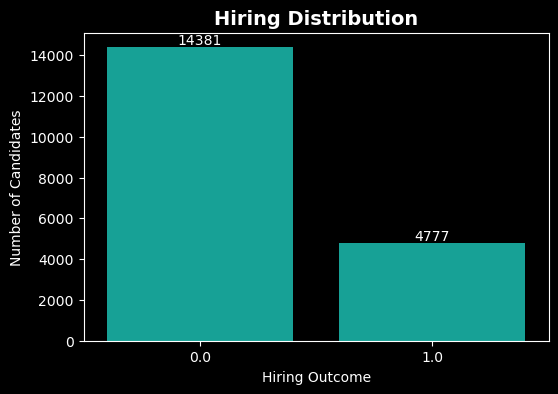

In [6]:
# Visualizing the distribution of hired vs not hired candidates
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='target')
plt.title('Hiring Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Hiring Outcome')
plt.ylabel('Number of Candidates')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='white')
plt.show()


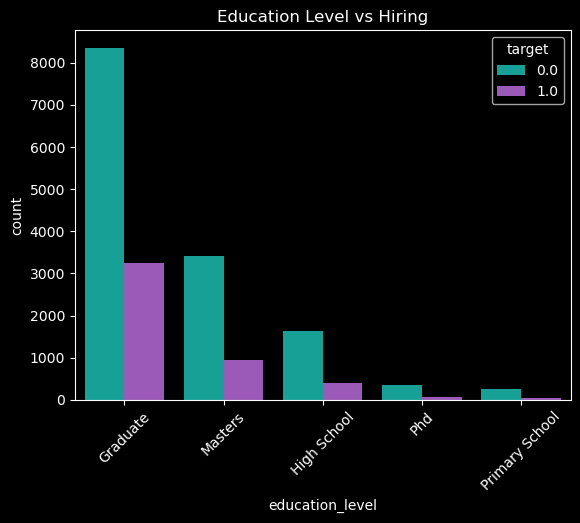

In [7]:
#Understanding the effect of education on hiring
sns.countplot(data=df, x='education_level', hue='target')
plt.title('Education Level vs Hiring')
plt.xticks(rotation=45)
plt.show()

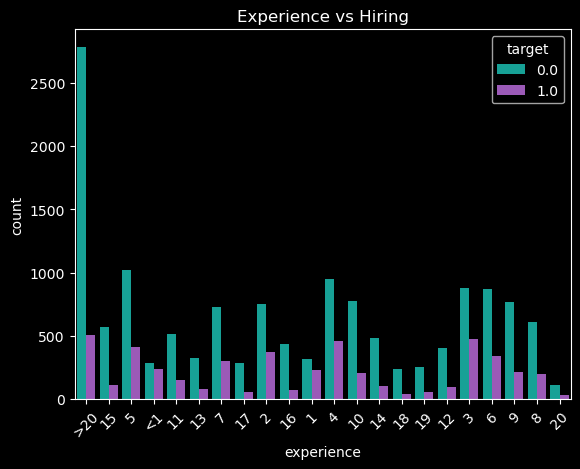

In [8]:
#Understanding the effect of Experience on hiring
sns.countplot(data=df, x='experience', hue='target')
plt.title('Experience vs Hiring')
plt.xticks(rotation=45)
plt.show()

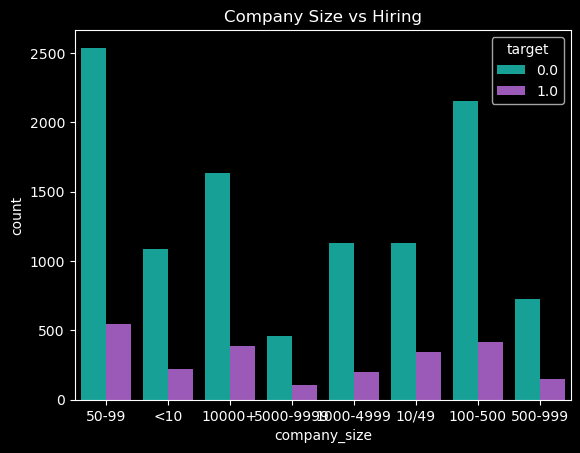

In [9]:
# Analyze if company size affects hiring
sns.countplot(data=df, x='company_size', hue='target')
plt.title('Company Size vs Hiring')
plt.show()

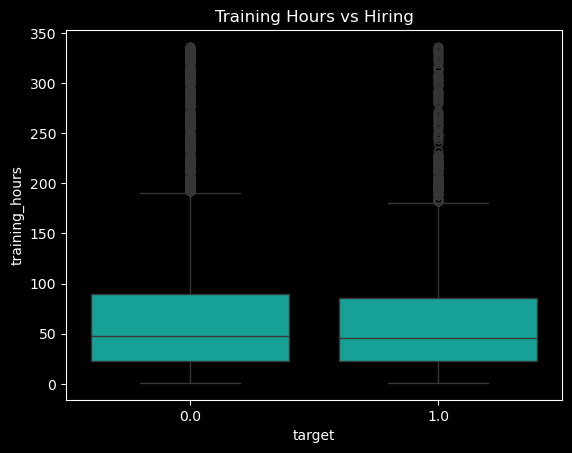

In [10]:
sns.boxplot(data=df, x='target', y='training_hours')
plt.title('Training Hours vs Hiring')
plt.show()

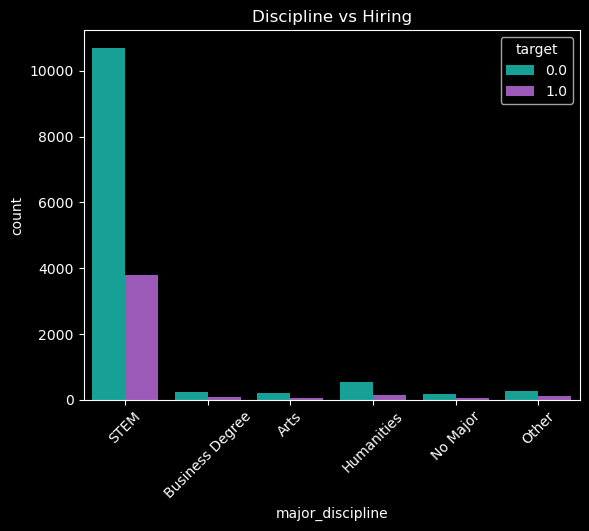

In [11]:
# Field of study impact on hiring
sns.countplot(data=df, x='major_discipline', hue='target')
plt.title('Discipline vs Hiring')
plt.xticks(rotation=45)
plt.show()


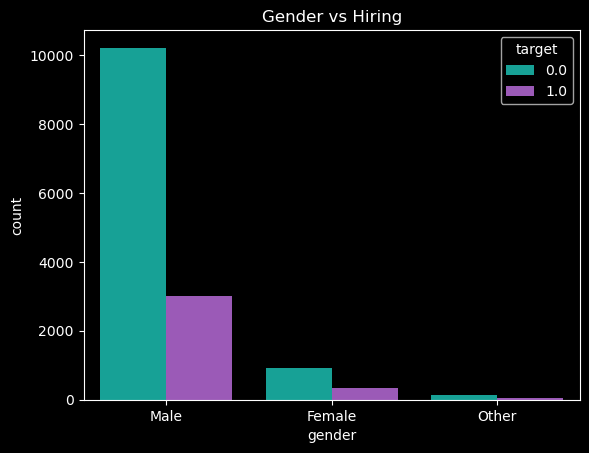

In [12]:
#Gender distribution and hiring outcome
sns.countplot(data=df, x='gender', hue='target')
plt.title('Gender vs Hiring')
plt.show()

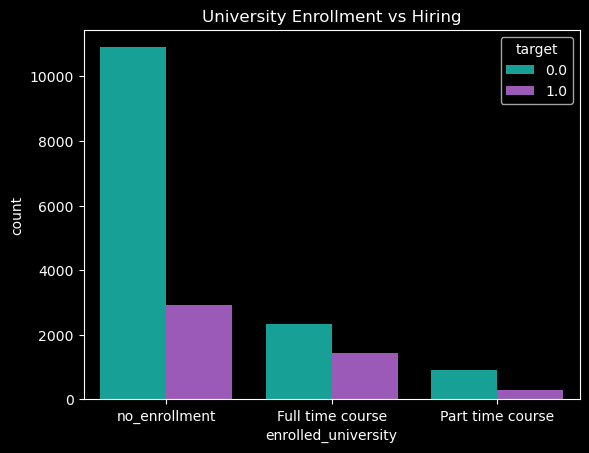

In [13]:
#enrollment status and hiring outcome
sns.countplot(data=df, x='enrolled_university', hue='target')
plt.title('University Enrollment vs Hiring')
plt.show()

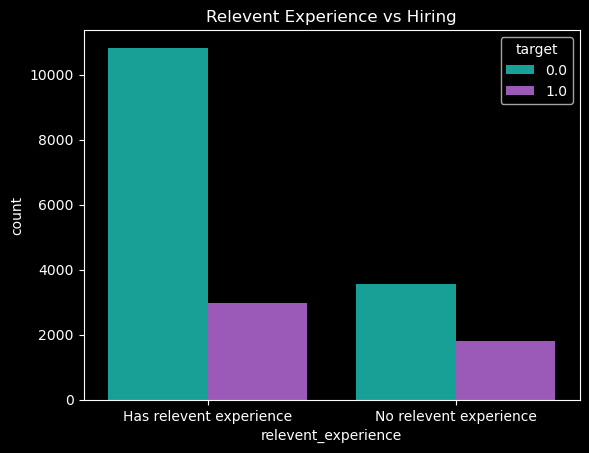

In [14]:
#Relevant work experience correlation with hiring
sns.countplot(data=df, x='relevent_experience', hue='target')
plt.title('Relevent Experience vs Hiring')
plt.show()

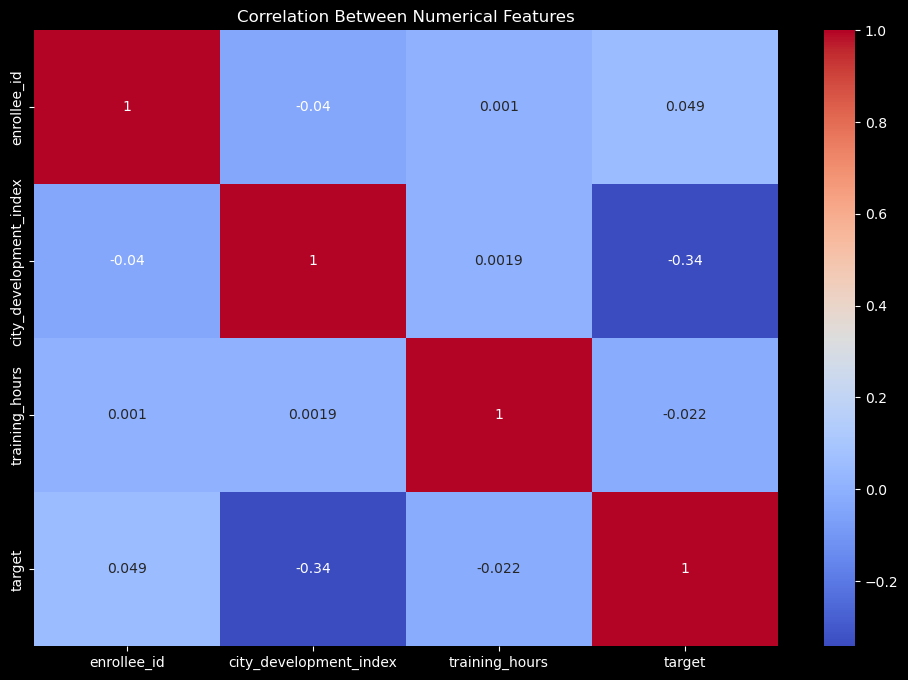

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

In [16]:
df.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [17]:
## Step 2: Data Cleaning & Preprocessing
data=df.copy()
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [47]:
data = data.fillna({
    'company_type': 'Unknown',
    'company_size': 'Unknown',
    'gender': 'Other',
    'major_discipline': 'Other',
    'education_level': data['education_level'].mode()[0],
    'last_new_job': 'Unknown',
    'enrolled_university': data['enrolled_university'].mode()[0],
    'experience': 'Unknown'
})

In [48]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [49]:
## Step 3: Model Building and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [50]:
df_model=data.copy()

In [51]:
le=LabelEncoder()
for col in df_model.columns:
 if df_model[col].dtype=='object':
      df_model[col]=le.fit_transform(df_model[col])
     


In [52]:
df_model.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,2,0,5,21,8,6,0,36,1.0
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,11561,64,0.624,2,1,0,0,5,15,8,6,6,83,0.0
3,33241,14,0.789,2,1,2,0,1,20,8,5,6,52,1.0
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8,0.0


In [53]:
X=df_model.drop('target',axis=1)
y=df_model['target']

In [54]:
print(X.shape)
print(y.shape)

(19158, 13)
(19158,)


In [55]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [56]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15326, 13)
y_train shape: (15326,)
X_test shape: (3832, 13)
y_test shape: (3832,)


In [57]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [58]:
y_pred=model.predict(X_test)
print(y_pred[:10])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [59]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification_report:\n",classification_report(y_test,y_pred))


accuracy_score: 0.7473903966597077

confusion_matrix:
 [[2619  261]
 [ 707  245]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.84      2880
         1.0       0.48      0.26      0.34       952

    accuracy                           0.75      3832
   macro avg       0.64      0.58      0.59      3832
weighted avg       0.71      0.75      0.72      3832



In [60]:
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred_rf=rf_model.predict(X_test)

In [62]:
print("accuracy_score: ", accuracy_score(y_test,y_pred_rf))
print("\nconfusion_matrix: \n",confusion_matrix(y_test,y_pred_rf))
print("\nclassification_report: \n",classification_report(y_test,y_pred_rf))

accuracy_score:  0.7828810020876826

confusion_matrix: 
 [[2534  346]
 [ 486  466]]

classification_report: 
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      2880
         1.0       0.57      0.49      0.53       952

    accuracy                           0.78      3832
   macro avg       0.71      0.68      0.69      3832
weighted avg       0.77      0.78      0.78      3832



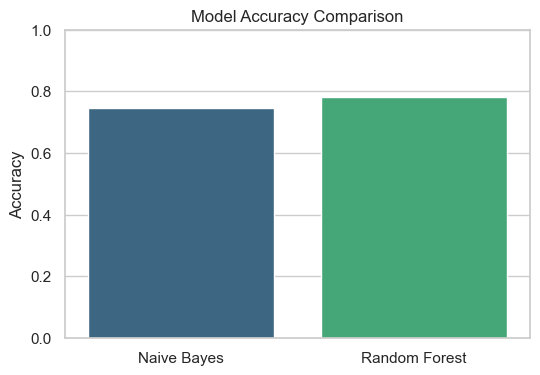

In [63]:
model_names = ['Naive Bayes', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracies, hue=model_names, dodge=False, palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [64]:

final_df = data.copy()


for col in final_df.columns:
    if final_df[col].dtype == 'object':
        final_df[col] = le.fit_transform(final_df[col])


X_final = final_df.drop('target', axis=1)


final_df['predicted_hired'] = rf_model.predict(X_final)
s
final_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,predicted_hired
0,8949,5,0.920,1,0,2,0,5,21,8,6,0,36,1.0,1.0
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47,0.0,0.0
2,11561,64,0.624,2,1,0,0,5,15,8,6,6,83,0.0,0.0
3,33241,14,0.789,2,1,2,0,1,20,8,5,6,52,1.0,0.0
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8,0.0,0.0


In [65]:
final_df.to_csv("recruitment_funnel_predictions.csv", index=False)
print("File saved as 'recruitment_funnel_predictions.csv'")


File saved as 'recruitment_funnel_predictions.csv'


In [67]:
test_df=pd.read_csv(r'C:\Users\Rushikesh Patil\Downloads\archive (1)\aug_test.csv')
print("Shape of test_df: ",test_df.shape)

Shape of test_df:  (2129, 13)


In [68]:
test_df.isnull().sum().sort_values(ascending=False)

company_type              634
company_size              622
gender                    508
major_discipline          312
education_level            52
last_new_job               40
enrolled_university        31
experience                  5
enrollee_id                 0
city                        0
city_development_index      0
relevent_experience         0
training_hours              0
dtype: int64

In [69]:
test_df=test_df.fillna({
    'company_type':'Unknown',
    'company_size':'Unknown',
    'gender':'Other',
    'major_discipline':'Other',
    'education_level':test_df['education_level'].mode()[0],
    'last_new_job': 'Unknown',
    'enrolled_university': test_df['enrolled_university'].mode()[0],
    'experience': 'Unknown'
})
    

In [70]:
test_df.isnull().sum().sort_values(ascending=False)

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [74]:
test_encoded=test_df.copy()

le=LabelEncoder()
for col in test_encoded.columns:
      if test_encoded[col].dtype=='object':
          test_encoded[col]=le.fit_transform(test_encoded[col])
test_encoded.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,69,0.827,1,0,0,0,5,19,7,6,0,21
1,9858,5,0.920,0,0,2,0,5,15,8,5,0,98
2,31806,55,0.624,1,1,2,1,4,20,8,5,6,15
3,27385,22,0.827,1,0,2,2,5,2,0,5,0,39
4,27724,5,0.920,1,0,2,0,5,21,3,5,4,72


In [76]:
test_prediction=rf_model.predict(test_encoded)


array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
test_df['Predicted_hired']=test_prediction
test_df.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Predicted_hired
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Unknown,1,21,0.0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Unknown,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Other,<1,Unknown,Pvt Ltd,never,15,0.0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,0.0
5,217,city_23,0.899,Male,No relevent experience,Part time course,Masters,STEM,10,Unknown,Unknown,2,12,0.0
6,21465,city_21,0.624,Other,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,11,1.0
7,27302,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,>4,81,1.0
8,12994,city_173,0.878,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Unknown,Unknown,4,2,0.0
9,16287,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,Other,3,50-99,Funded Startup,1,4,0.0


In [83]:
test_df.to_csv("Recruitment_Predictions.csv", index=False)
print("File saved successfully as 'Recruitment_Predictions.csv'")


File saved successfully as 'Recruitment_Predictions.csv'


In [84]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7828810020876826
